In [27]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float], return_intervals=False):
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    if return_intervals:
        intervals = [(xs[j], xs[j+1]) for j in range(n)]
        return splines, intervals
    return splines


In [28]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


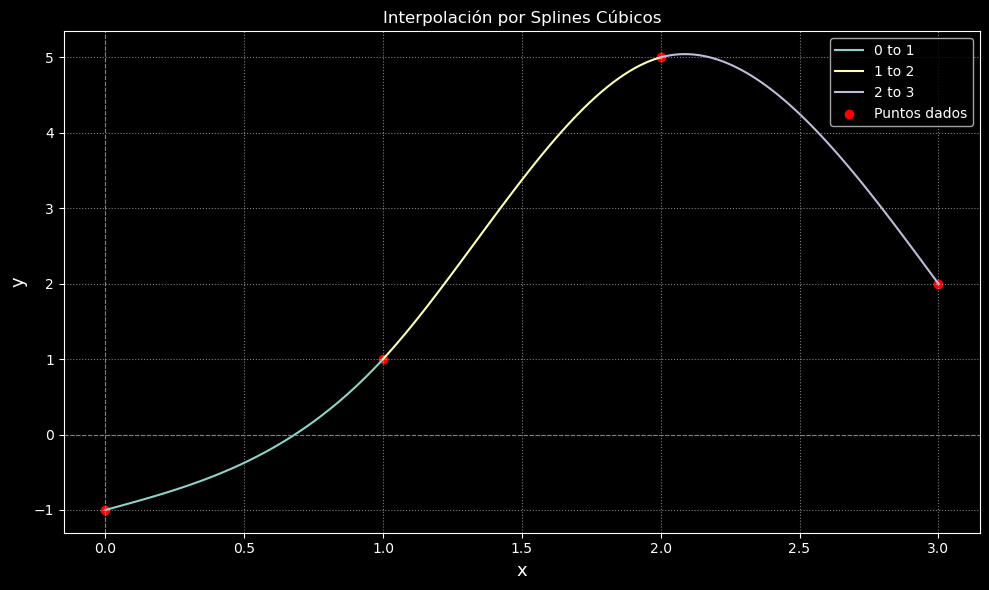

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Datos
xs = [0,1,2,3]
ys = [-1,1,5,2]

# Obtener los splines y sus intervalos
splines, intervals = cubic_spline(xs, ys, return_intervals=True)


# Variable simbólica
x_sym = sym.Symbol('x')

# Crear la figura
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# Dibujar cada spline en su intervalo
for S, (x_start, x_end) in zip(splines, intervals):
    f_lambdified = sym.lambdify(x_sym, S, modules=["numpy"])
    x_vals = np.linspace(x_start, x_end, 100)
    y_vals = f_lambdified(x_vals)
    plt.plot(x_vals, y_vals, label=f'{round(x_start,2)} to {round(x_end,2)}')

# Dibujar los puntos originales
plt.scatter(xs, ys, color='red', label='Puntos dados')

# Detalles de la gráfica
plt.title('Interpolación por Splines Cúbicos')
plt.xlabel('x', fontsize=13, color='white')
plt.ylabel('y', fontsize=13, color='white')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
